[pyplot 공식 도큐먼트](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (12, 9)

# 7. Box Plot

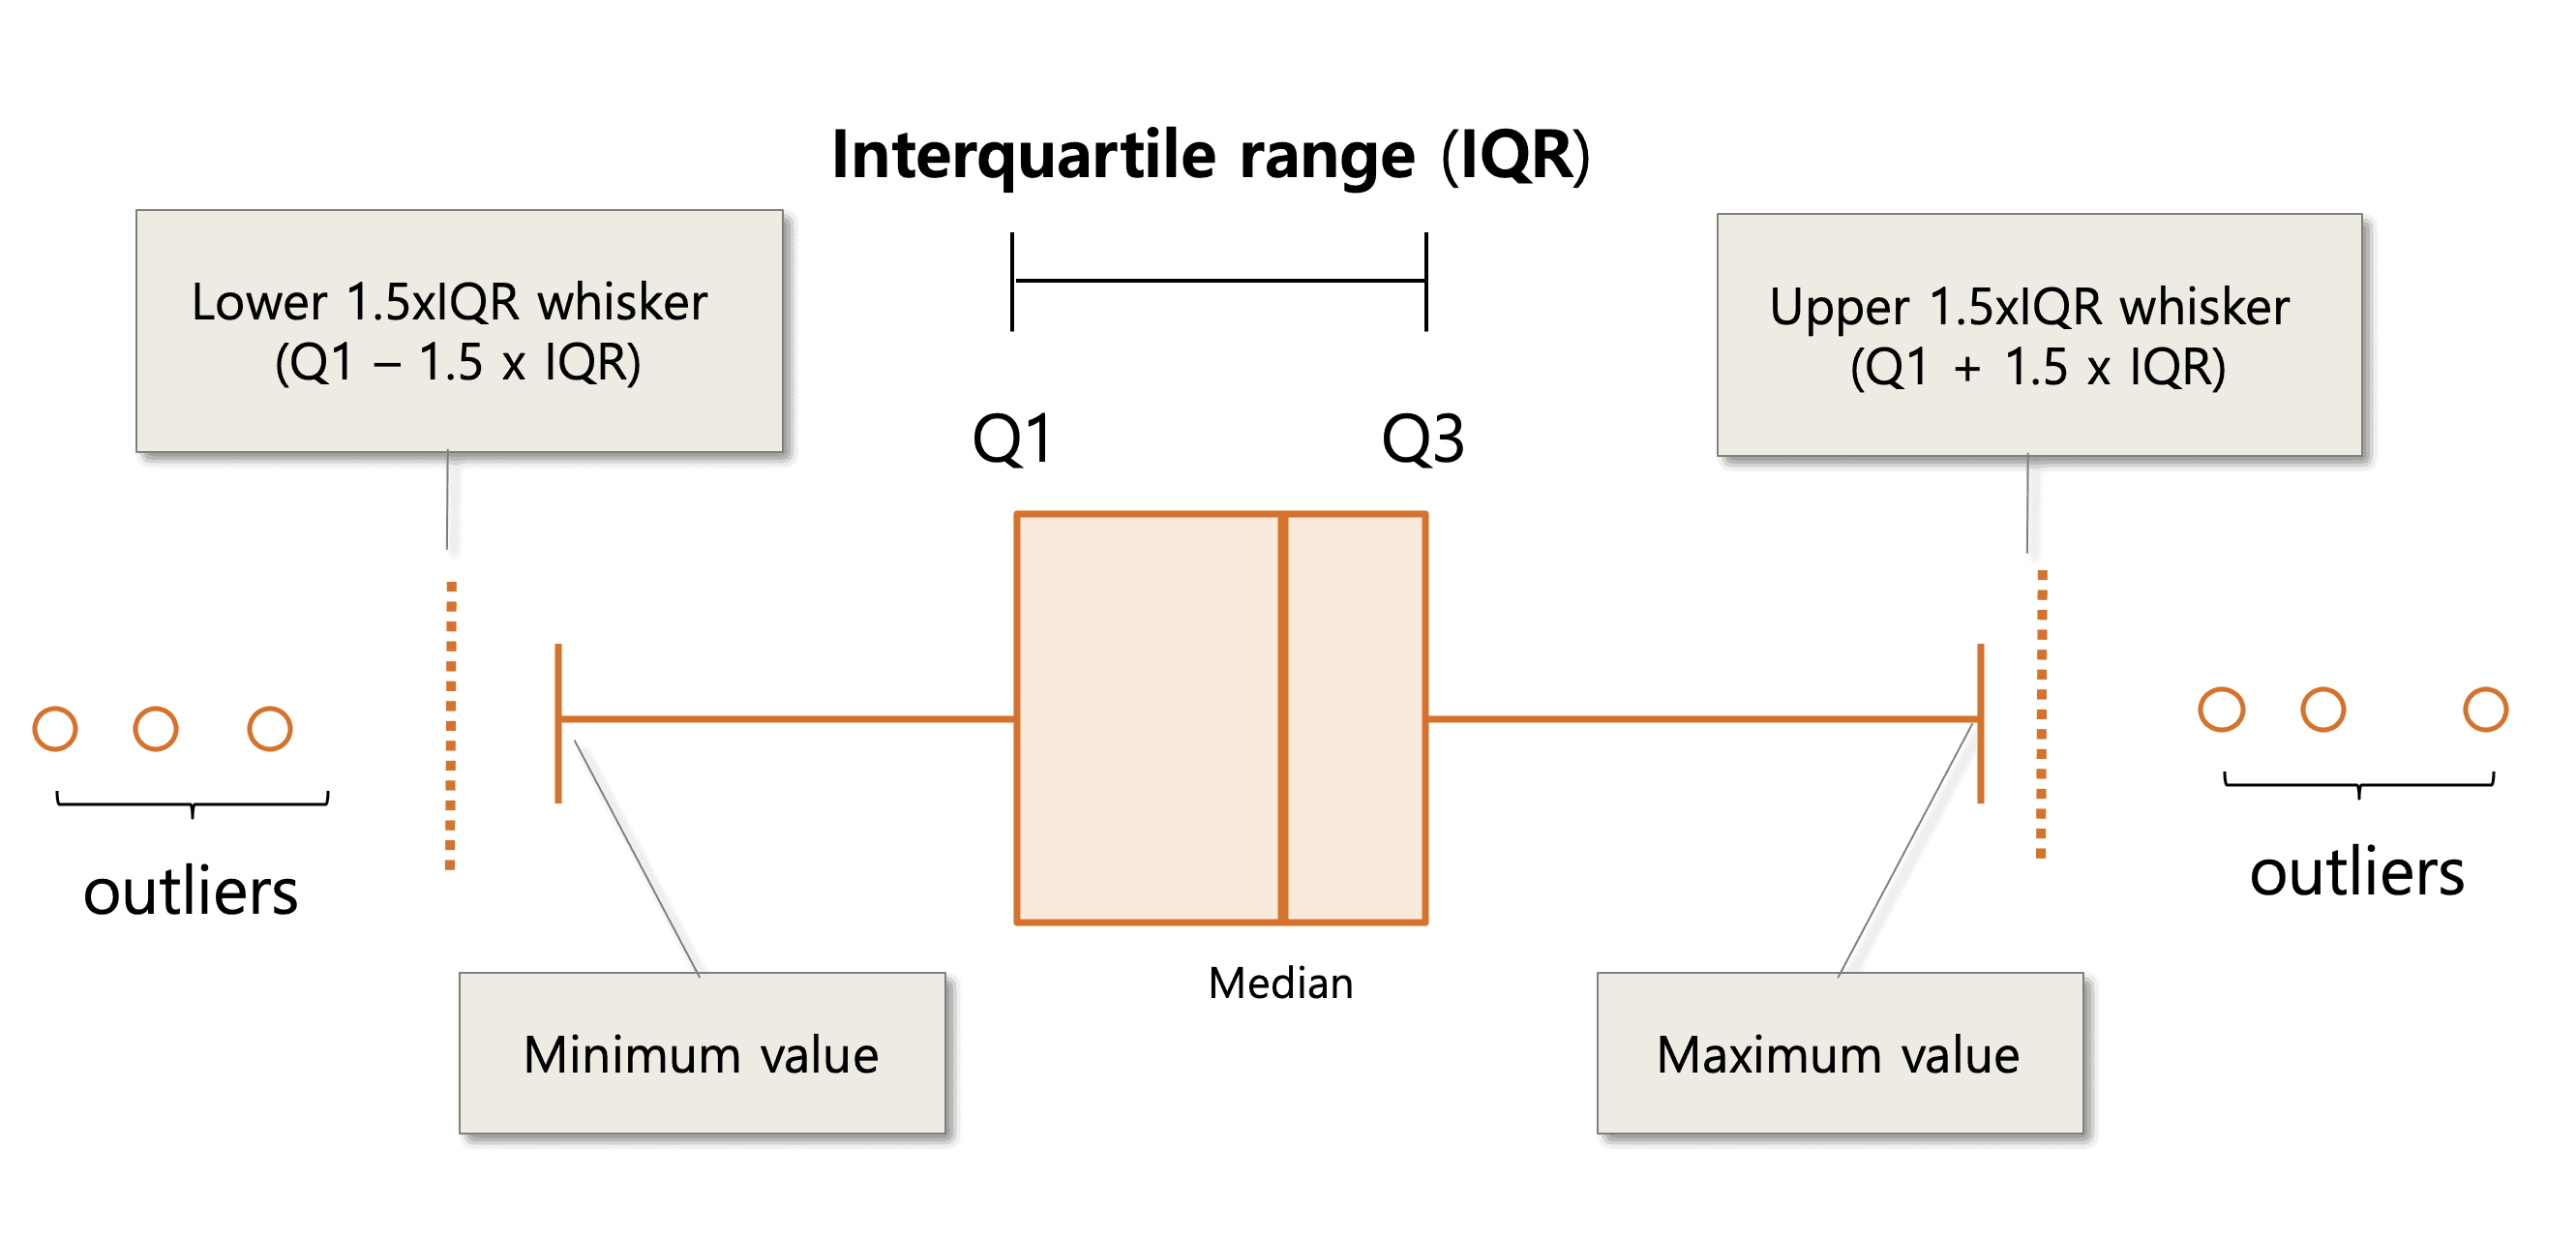

- 기본적으로 Boxplot은 median, Q1, Q3 값이 어느정도 인지, Max, Min 값이 어떤 것인지 보는 것이 기본 목적이다.
- 추가적으로는 전체 데이터에서 outliers (이상치)로 판단 되는 값이 어디인지를 시각화 해서 볼 수도 있다.
- 또한 해당 이상치들의 분포를 통해 데이터의 균형 & 불균형 여부 판단도 가능하다.

In [27]:
# 샘플 데이터 생성
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

## 7-1 기본 박스플롯 생성

plt.boxplot(data)

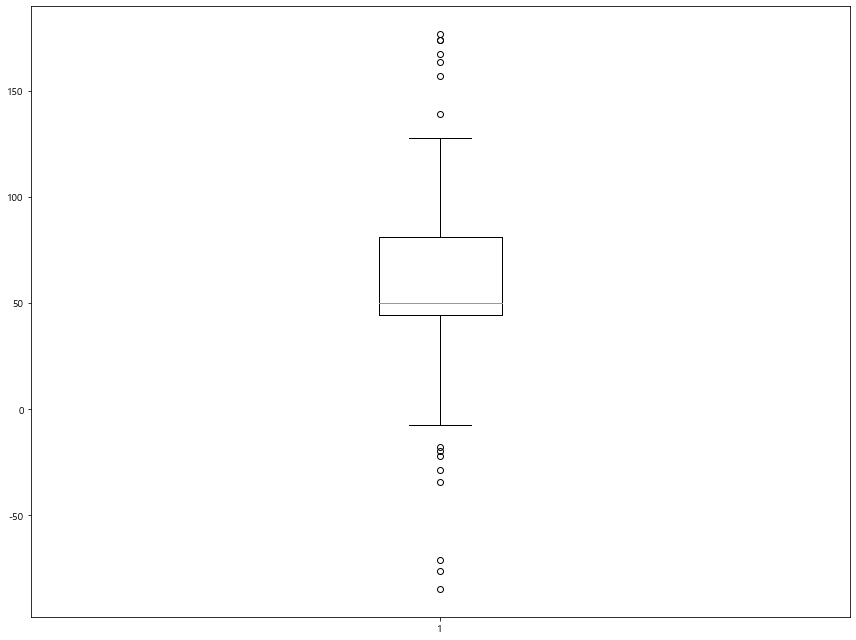

In [28]:
plt.boxplot(data)
plt.tight_layout() # graph의 배치를 자동으로 조절해주어 fit한 graph를 생성
plt.show()

## 7-2. 다중 박스플롯 생성

In [29]:
# 샘플 데이터 생성
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))


spread = np.random.rand(50) * 100
center = np.ones(25) * 30
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d3 = np.concatenate((spread, center, flier_high, flier_low))


#data.shape = (-1, 1)
#d2.shape = (-1, 1)
#d3.shape = (-1, 1)

data = [data, d2, d3]

**boxplot()**으로 매우 쉽게 생성할 수 있다.

다중 그래프 생성을 위해서는 data 자체가 **2차원으로 구성**되어 있어야 한다.

row와 column으로 구성된 DataFrame에서 Column은 X축에 Row는 Y축에 구성된다고 이해하면 좋다.

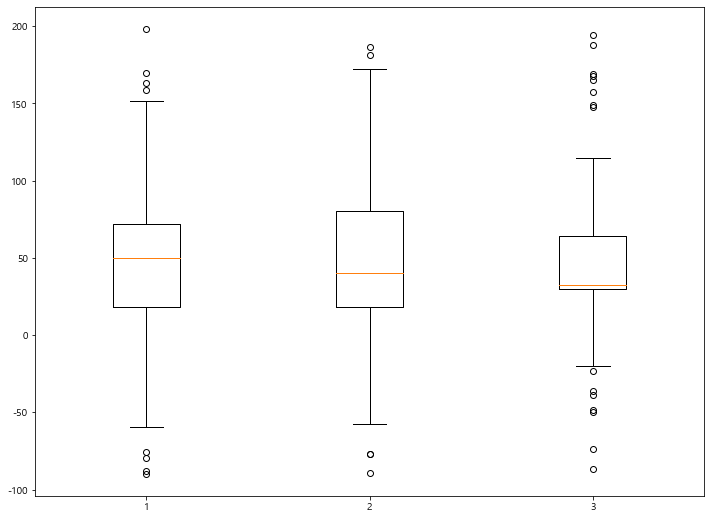

In [30]:
plt.boxplot(data)
plt.show()

## 7-3. Box Plot 축 바꾸기

**vert=False**  옵션을 통해 표시하고자 하는 축을 바꿀 수 있다.

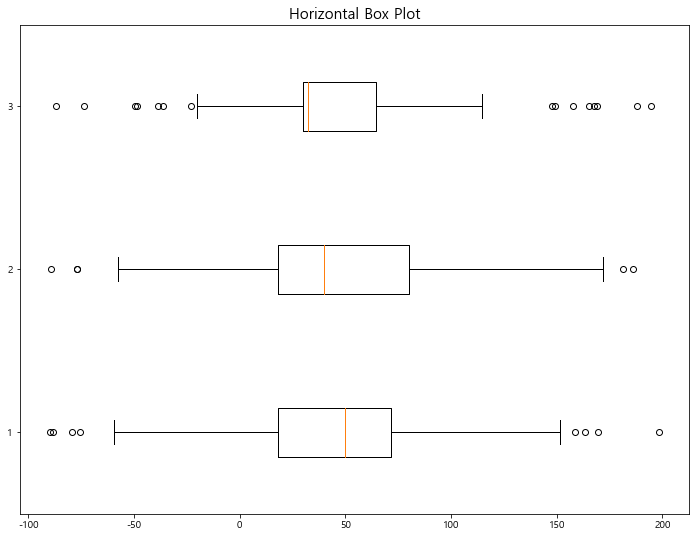

In [31]:
plt.title('Horizontal Box Plot', fontsize=15)
plt.boxplot(data, vert=False)

plt.show()

## 7-4. Outlier 마커 심볼과 컬러 변경

In [32]:
outlier_marker = dict(markerfacecolor='r', marker='D')

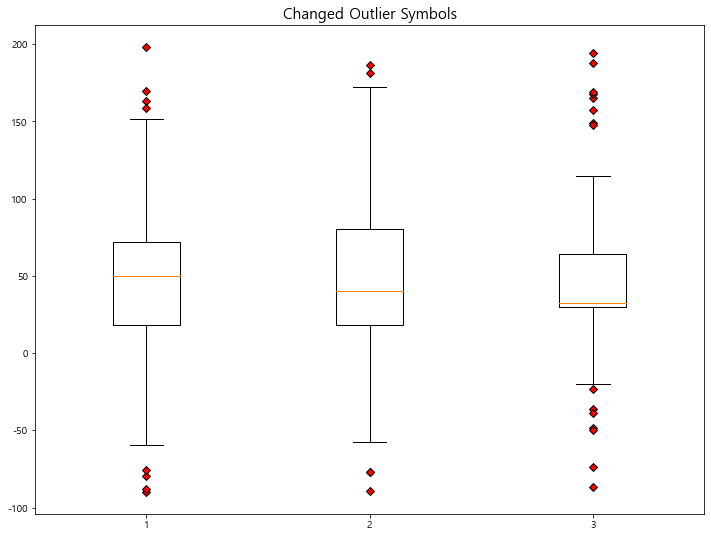

In [33]:
plt.title('Changed Outlier Symbols', fontsize=15)
plt.boxplot(data, flierprops=outlier_marker)

plt.show()

# 8. 3D 그래프 그리기

3d 로 그래프를 그리기 위해서는 `mplot3d`를 추가로 import 해야 한다.

In [34]:
from mpl_toolkits import mplot3d

## 8-1. 밑그림 그리기 (캔버스)

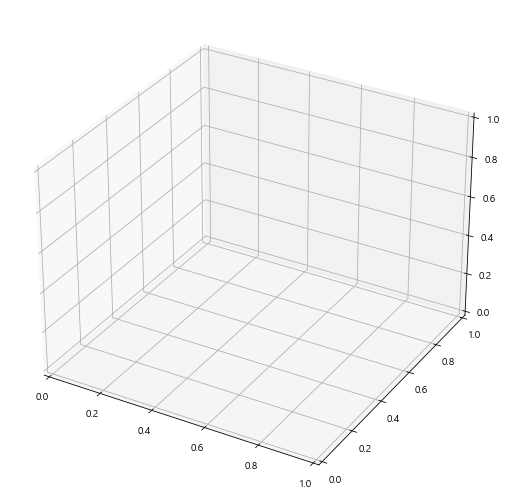

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')

## 8-2. 3d plot 그리기

- 일반 plot함수에 x, y, z값을 직접 입력 하는 방식

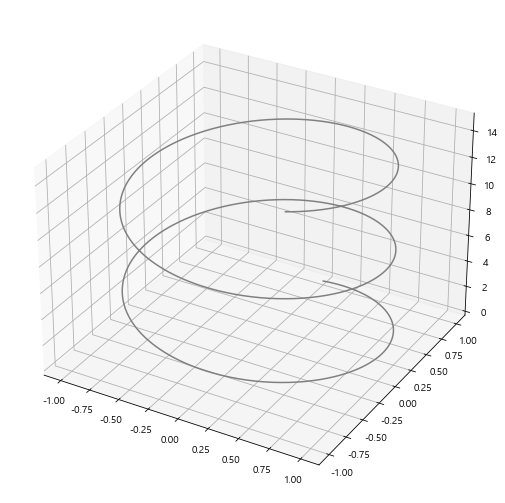

In [36]:
# project=3d로 설정
# 밑 그림 그리기
ax = plt.axes(projection='3d') 

# x, y, z 데이터를 생성
z = np.linspace(0, 15, 1000)
x = np.sin(z)
y = np.cos(z)

# 데이터 입력
ax.plot(x, y, z, 'gray')

# 시각화
plt.show()

- plot3D() 함수를 활용하는 방식

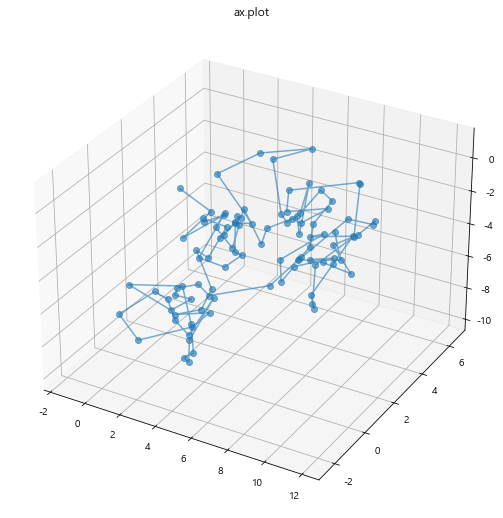

In [37]:
# project=3d로 설정
ax = plt.axes(projection='3d')

# 데이터 생성 및 입력
# np.cumsum() : 배열에서 주어진 축에 따라 누적되는 원소들의 누적 합을 계산하는 함수
sample_size = 100
x = np.cumsum(np.random.normal(0, 1, sample_size))
y = np.cumsum(np.random.normal(0, 1, sample_size))
z = np.cumsum(np.random.normal(0, 1, sample_size))

ax.plot3D(x, y, z, alpha=0.6, marker='o')

plt.title("ax.plot")
plt.show()

## 8-3. 3d-scatter 그리기

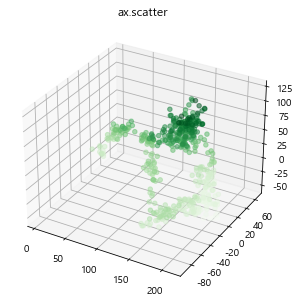

In [38]:
# canvas 그리기
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

# 데이터 생성
sample_size = 500

x = np.cumsum(np.random.normal(0, 5, sample_size))
y = np.cumsum(np.random.normal(0, 5, sample_size))
z = np.cumsum(np.random.normal(0, 5, sample_size))

# scatter plot그리기
# cmap으로 색상 일치화
ax.scatter(x, y, z, c = z, s=20, alpha=0.5, cmap='Greens')

plt.title("ax.scatter")
plt.show()

- cmap으로 동일 색상을 적용했으나, 색상이 진한 부분이 보인다.
- 이 부분은 데이터가 더 밀집되어 있어 색이 겹치면서 진해진 것.

## 8-4. contour3D 그리기 (등고선)

- contour3D(x,y,z, size, color)
- np.meshgrid() : 1차원 좌표 배열 (x1, x2..... xn)에서 N차원 직사각형 격자를 만드는 함수

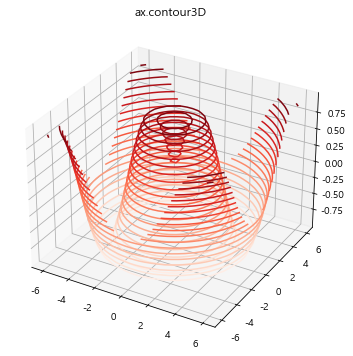

In [39]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
x, y = np.meshgrid(x, y)

z = np.sin(np.sqrt(x**2 + y**2))

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')

ax.contour3D(x, y, z, 20, cmap='Reds')

plt.title("ax.contour3D")
plt.show()

# 9. imshow

- im =  image 라고 생각하면 이해가 쉽다.
- 이미지(image) 데이터와 유사하게 행과 열을 가진 2차원의 데이터를 시각화 할 때는 `imshow`를 활용한다.

이미지 데이터가 numpy array형태 일때는 숫자형으로 표현이 된다.

In [40]:
# 숫자 0~9를 이미지로 표현한 데이터 set
from sklearn.datasets import load_digits 

digits = load_digits()
X = digits.images[:10]
X[0] # 8x8 array로 하나의 숫자 이미지가 표현된 것.

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

* `load_digits`는 0~16 값을 가지는 array로 이루어져 있다.

* 1개의 array는 8 X 8 배열 안에 표현되어 있다.

* 숫자는 0~9까지 이루어져있다.

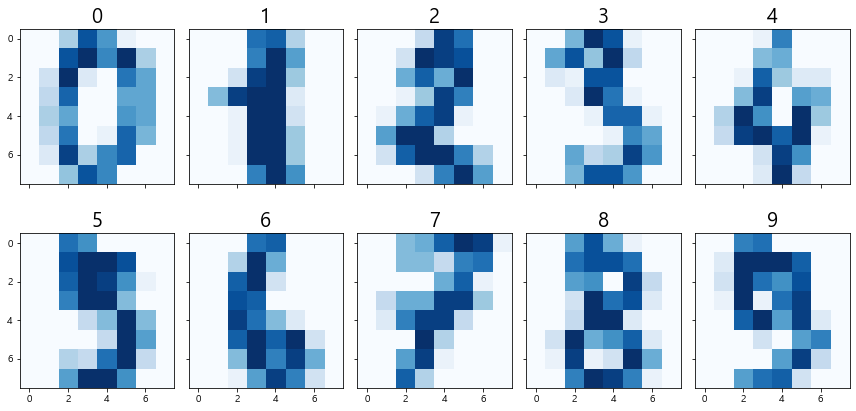

In [41]:
# 0 ~ 9 를 각각 시각화 하기 위해 10개의 subplot 생성
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, figsize=(12, 6), sharey=True)

for i in range(10):
    axes[i//5][i%5].imshow(X[i], cmap='Blues')
    axes[i//5][i%5].set_title(str(i), fontsize=20)

    
plt.tight_layout()
plt.show()

**References**

[Matplotlib Document](https://matplotlib.org/)